# CS/ECE/ISyE 524 - S'23 - HW 4 

# **Huong Thien Do**


## 1. Network Reliability

We consider a telecommunications network with a given pattern of interconnections. This network consists of eleven sites connected by bidirectional lines for data transmission. Each line has a bandwidth (i.e. maximum rate for data transmission) of 1.0. We are interested in the total bandwidth for the connection between nodes 10 and 11, and what happens to this bandwidth if a node is eliminated.

**(a)** Formulate the problem as a maxflow problem and solve. (Hint: Each bidirectional line can be represented by two directional edges, one in each direction. That is, if there is a line connecting nodes i and j, then [i,j] and [j,i] are both edges in the edge set. See the definition  of the set "edges" in the starter file.)

**(b)** By adjusting your model for part (a), **not** recoding the edge set from scratch, find what happens if node 3 is eliminated from the graph. (That is, all lines connected to node 3 can no longer carry data.) What is the new maximum bandwidth between nodes 10 and 11?

**(c)** Can your maxflow problem be reformulated more compactly by using birectional lines? That is, redefining the edge set by eliminating duplicated lines (see the starter code) while allowing data to flow in either direction. Write down your reformulation of part (a) and code and solve it in Julia.


In [22]:
using Pkg
Pkg.add("HiGHS")
Pkg.add("JuMP")

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`


### 1 a) 

Standard maxflow formulation

In [113]:
using JuMP, HiGHS

# define nodes and edge set for the given graph - two directed edges for each birectional line

nodes = 1:11
edges = ([1,2], [1,3], [1,11], [2,1], [2,3], [2,8], [2,9], [3,1], [3,2], [3,4], [3,9], [3,10], [3,11], 
    [4,3], [4,5], [4,6], [4,11], [5,4], [5,9], [5,11], [6,4], [6,7], [6,9], [6,10],
    [7,6], [7,8], [7,10],[8,7], [8,2], [8,10], [9,6], [9,5], [9,3], [9,2], [9,10],
    [10,6], [10,9], [10,3], [10,8], [10,7], [11,4], [11,1], [11,3], [11,5])


# Create a JuMP model object
m = Model(HiGHS.Optimizer)

# Define flow variables for each edge
@variable(m,0 <= x[edges] <= 1)
for node = 1:9
    i = 0 
    j = 0
    for edge in edges
        if edge[1] == node
            i += x[edge]
        end
        if edge[2] == node
            j += x[edge]
        end
    end
    @constraint(m,i == j)
end
 
k = 0
for edge in edges
    if edge[1] == 11
        k += x[edge]
    end
end

@objective(m, Max, k)
optimize!(m)
print("Maximum flow: ", objective_value(m) )


Running HiGHS 1.4.2 [date: 1970-01-01, git hash: f797c1ab6]
Copyright (c) 2022 ERGO-Code under MIT licence terms
Presolving model
9 rows, 44 cols, 70 nonzeros
9 rows, 25 cols, 38 nonzeros
9 rows, 25 cols, 38 nonzeros
Presolve : Reductions: rows 9(-0); columns 25(-19); elements 38(-32)
Solving the presolved LP
Using EKK dual simplex solver - serial
  Iteration        Objective     Infeasibilities num(sum)
          0     0.0000000000e+00 Ph1: 0(0) 0s
         13    -4.0000000000e+00 Pr: 0(0) 0s
Solving the original LP from the solution after postsolve
Model   status      : Optimal
Simplex   iterations: 13
Objective value     :  4.0000000000e+00
HiGHS run time      :          0.00
Maximum flow: 4.0

### 1 b) 


In [114]:
using JuMP, HiGHS

# define nodes and edge set for the given graph - two directed edges for each birectional line

nodes = 1:11
edges = ([1,2], [1,11], [2,1], [2,8], [2,9],
    [4,5], [4,6], [4,11], [5,4], [5,9], [5,11], [6,4], [6,7], [6,9], [6,10],
    [7,6], [7,8], [7,10],[8,7], [8,2], [8,10], [9,6], [9,5], [9,2], [9,10],
    [10,6], [10,9], [10,8], [10,7], [11,4], [11,1], [11,5])

# Create a JuMP model object
m = Model(HiGHS.Optimizer)

# Define flow variables for each edge
@variable(m,0 <= x[edges] <= 1)
for node = 1:9
    i = 0 
    j = 0
    for edge in edges
        if edge[1] == node
            i += x[edge]
        end
        if edge[2] == node
            j += x[edge]
        end
    end
    @constraint(m,i == j)
end
 
k = 0
for edge in edges
    if edge[1] == 11
        k += x[edge]
    end
end

@objective(m, Max, k)
optimize!(m)
print("Maximum flow: ", objective_value(m) )


Running HiGHS 1.4.2 [date: 1970-01-01, git hash: f797c1ab6]
Copyright (c) 2022 ERGO-Code under MIT licence terms
Presolving model
8 rows, 32 cols, 50 nonzeros
8 rows, 19 cols, 28 nonzeros
7 rows, 18 cols, 26 nonzeros
Presolve : Reductions: rows 7(-2); columns 18(-14); elements 26(-24)
Solving the presolved LP
Using EKK dual simplex solver - serial
  Iteration        Objective     Infeasibilities num(sum)
          0     0.0000000000e+00 Ph1: 0(0) 0s
         10    -3.0000000000e+00 Pr: 0(0) 0s
Solving the original LP from the solution after postsolve
Model   status      : Optimal
Simplex   iterations: 10
Objective value     :  3.0000000000e+00
HiGHS run time      :          0.00
Maximum flow: 3.0

### 1 c) 

**WRITE YOUR FORMULATION OF THE COMPACT PROBLEM HERE**

In [115]:
using JuMP, HiGHS

# version with bidirectional edges

nodes = 1:11
edges = ([1,2], [1,3], [1,11], [2,3], [2,8], [2,9], [3,4], [3,9], [3,10], [3,11], 
    [4,5], [4,6], [4,11], [5,9], [5,11], [6,7], [6,9], [6,10],
    [7,8], [7,10],[8,10], [9,10])

# Create a JuMP model object
m = Model(HiGHS.Optimizer)

# Define flow variables for each edge
@variable(m, x[edges] <= 1)
for node = 1:9
    i = 0 
    j = 0
    for edge in edges
        if edge[1] == node
            i += x[edge]
        end
        if edge[2] == node
            j += x[edge]
        end
    end
    @constraint(m,i == j)
end
 
k = 0
for edge in edges
    if edge[2] == 11
        k += x[edge]
    end
end

@objective(m, Max, k)
optimize!(m)
print("Maximum flow: ", objective_value(m) )


Running HiGHS 1.4.2 [date: 1970-01-01, git hash: f797c1ab6]
Copyright (c) 2022 ERGO-Code under MIT licence terms
Presolving model
9 rows, 21 cols, 34 nonzeros
9 rows, 21 cols, 34 nonzeros
Presolve : Reductions: rows 9(-0); columns 21(-1); elements 34(-1)
Solving the presolved LP
Using EKK dual simplex solver - serial
  Iteration        Objective     Infeasibilities num(sum)
          0    -4.0000196806e+00 Pr: 9(17) 0s
         14    -4.0000000000e+00 Pr: 0(0) 0s
Solving the original LP from the solution after postsolve
Model   status      : Optimal
Simplex   iterations: 14
Objective value     :  4.0000000000e+00
HiGHS run time      :          0.00
Maximum flow: 4.0

## 2. Stigler's supplement

### 2 a)

In [88]:
import Pkg
Pkg.add("CSV")
Pkg.add("DataFrames")
Pkg.add("NamedArrays")

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`
    Building Gurobi → `~/.julia/scratchspaces/44cfe95a-1eb2-52ea-b672-e2afdf69b78f/82a44a86f4dc4fa4510c9d49b0a74d3d73914d5c/build.log`


In [106]:
# STARTER CODE FOR STIGLER'S DIET PROBLEM

using NamedArrays, CSV, DataFrames, Gurobi

# import Stigler's data set
raw = CSV.read("stigler.csv", DataFrame);
(m,n) = size(raw)

n_nutrients = 2:n      # columns containing nutrients

# list of food
foods = raw[2:end,1]
# list of nutrients
nutrients = [string(names(raw)[i]) for i=2:length(names(raw))]

# minimum required amount of each nutrient
lower = Dict( zip(nutrients,raw[1,n_nutrients]) )

# data[f,i] is the amount of nutrient i contained in food f 
dataraw = Matrix(values(raw[2:end,2:end]))
data = NamedArray(dataraw,(foods,nutrients),("foods","nutrients"))
                
        
println("Foods:\n")
for i in foods
    println(i)
end


println("\n\nNutrient Lower Bounds:\n")
for j in nutrients
    println(j," at least: ",lower[j])
end

Foods:

Wheat Flour (Enriched)
Macaroni
Wheat Cereal (Enriched)
Corn Flakes
Corn Meal
Hominy Grits
Rice
Rolled Oats
White Bread (Enriched)
Whole Wheat Bread
Rye Bread
Pound Cake
Soda Crackers
Milk
Evaporated Milk (can)
Butter
Oleomargarine
Eggs
Cheese (Cheddar)
Cream
Peanut Butter
Mayonnaise
Crisco
Lard
Sirloin Steak
Round Steak
Rib Roast
Chuck Roast
Plate
Liver (Beef)
Leg of Lamb
Lamb Chops (Rib)
Pork Chops
Pork Loin Roast
Bacon
Ham, smoked
Salt Pork
Roasting Chicken
Veal Cutlets
Salmon, Pink (can)
Apples
Bananas
Lemons
Oranges
Green Beans
Cabbage
Carrots
Celery
Lettuce
Onions
Potatoes
Spinach
Sweet Potatoes
Peaches (can)
Pears (can)
Pineapple (can)
Asparagus (can)
Green Beans (can)
Pork and Beans (can)
Corn (can)
Peas (can)
Tomatoes (can)
Tomato Soup (can)
Peaches, Dried
Prunes, Dried
Raisins, Dried
Peas, Dried
Lima Beans, Dried
Navy Beans, Dried
Coffee
Tea
Cocoa
Chocolate
Sugar
Corn Syrup
Molasses
Strawberry Preserves


Nutrient Lower Bounds:

Calories (1000) at least: 3.0
Protein (

**INSERT ANSWERS AND EXPLANATIONS FOR PARTS a) AND b)**

In [139]:
m = Model(HiGHS.Optimizer)

@variable(m, 0 <= x[1:length(foods)])
food_name = ["Calories (1000)", "Protein (g)", "Calcium (g)", "Iron (mg)", "Vitamin A (1000 IU)", 
    "Thiamine (mg)", "Riboflavin (mg)", "Niacin (mg)", "Ascorbic Acid (mg)"]

for j in 1:size(data, 2)
    @constraint(m, sum(x[i]*data[i,j] for i in 1:length(foods)) >= lower[food_name[j]] )
end

@objective(m, Min, sum(x[i] for i=1:length(foods)))

optimize!(m)

Running HiGHS 1.4.2 [date: 1970-01-01, git hash: f797c1ab6]
Copyright (c) 2022 ERGO-Code under MIT licence terms
Presolving model
9 rows, 40 cols, 317 nonzeros
9 rows, 27 cols, 213 nonzeros
Presolve : Reductions: rows 9(-0); columns 27(-50); elements 213(-357)
Solving the presolved LP
Using EKK dual simplex solver - serial
  Iteration        Objective     Infeasibilities num(sum)
          0     0.0000000000e+00 Pr: 9(76.4375) 0s
          5     1.0866227821e-01 Pr: 0(0) 0s
Solving the original LP from the solution after postsolve
Model   status      : Optimal
Simplex   iterations: 5
Objective value     :  1.0866227821e-01
HiGHS run time      :          0.00


In [148]:
m_dual = Model(HiGHS.Optimizer)

@variable(m_dual, 0 <= x[1:length(n_nutrients)])
@objective(m_dual, Max, sum(x[i] * lower[nutrients[i]] for i=1:length(n_nutrients)) )
for i in 1:length(foods)
    @constraint(m_dual, sum(x[j] * data[i,j] for j in 1:length(n_nutrients)) <= 1)
end

optimize!(m_dual)

println("Objective Value: ", objective_value(m_dual) )
println("The final bill for ", nutrients[7], " with \$", value(x[7]) )

Running HiGHS 1.4.2 [date: 1970-01-01, git hash: f797c1ab6]
Copyright (c) 2022 ERGO-Code under MIT licence terms
Presolving model
43 rows, 9 cols, 335 nonzeros
25 rows, 9 cols, 195 nonzeros
Presolve : Reductions: rows 25(-53); columns 9(-0); elements 195(-376)
Solving the presolved LP
Using EKK dual simplex solver - serial
  Iteration        Objective     Infeasibilities num(sum)
          0    -1.7363233223e+00 Ph1: 25(295.5); Du: 7(1.73632) 0s
          9    -1.0810012589e-01 Pr: 0(0) 0s
Solving the original LP from the solution after postsolve
Model   status      : Optimal
Simplex   iterations: 9
Objective value     :  1.0810012589e-01
HiGHS run time      :          0.00
Objective Value: 0.10810012588561714
The final bill for Riboflavin (mg) with $0.01


### 2 b)

In [141]:
using NamedArrays, CSV, DataFrames

# import Stigler's data set
raw = CSV.read("stiglerPill.csv", DataFrame);
(m,n) = size(raw)

n_nutrients = 2:n    # columns containing nutrients

# list of food
foods = raw[2:end,1]
# list of nutrients
nutrients = [string(names(raw)[i]) for i=2:length(names(raw))]

# minimum required amount of each nutrient
lower = Dict( zip(nutrients,raw[1,n_nutrients]) )

# data[f,i] is the amount of nutrient i contained in food f 
dataraw = Matrix(values(raw[2:end,2:end]))
data = NamedArray(dataraw,(foods,nutrients),("foods","nutrients"))  
        
n_foods = 3:80
        
m = Model(HiGHS.Optimizer)

@variable(m, 0 <= x[1:length(n_foods)])
@objective(m, Min, sum(x[i] for i=1:length(n_foods)) )

food_name = ["Calories (1000)", "Protein (g)", "Calcium (g)", "Iron (mg)", "Vitamin A (1000 IU)", 
    "Thiamine (mg)", "Riboflavin (mg)", "Niacin (mg)", "Ascorbic Acid (mg)"]

for j in 1:size(data, 2)
    @constraint(m, sum(x[i] * data[i,j] for i in 1:length(n_foods) ) >= lower[food_name[j]] )
end

optimize!(m)

Running HiGHS 1.4.2 [date: 1970-01-01, git hash: f797c1ab6]
Copyright (c) 2022 ERGO-Code under MIT licence terms
Presolving model
9 rows, 44 cols, 336 nonzeros
9 rows, 26 cols, 196 nonzeros
Presolve : Reductions: rows 9(-0); columns 26(-52); elements 196(-375)
Solving the presolved LP
Using EKK dual simplex solver - serial
  Iteration        Objective     Infeasibilities num(sum)
          0     0.0000000000e+00 Pr: 9(76.4375) 0s
          5     1.0810012589e-01 Pr: 0(0) 0s
Solving the original LP from the solution after postsolve
Model   status      : Optimal
Simplex   iterations: 5
Objective value     :  1.0810012589e-01
HiGHS run time      :          0.00


In [152]:
m_dual = Model(HiGHS.Optimizer)

@variable(m_dual, 0 <= x[1:length(n_nutrients)])
@objective(m_dual, Max, sum(x[i] * lower[nutrients[i]] for i=1:length(n_nutrients)) )

for i in 1:length(n_foods)
    @constraint(m_dual, sum(x[j] * data[i,j] for j in 1:length(n_nutrients)) <= 1)
end
optimize!(m_dual)

for i in 1:9
    println(foods[i], ": ", value(x[i]))
end
println()
println("Objective Value: \$", objective_value(m_dual) * 365)

Running HiGHS 1.4.2 [date: 1970-01-01, git hash: f797c1ab6]
Copyright (c) 2022 ERGO-Code under MIT licence terms
Presolving model
43 rows, 9 cols, 335 nonzeros
25 rows, 9 cols, 195 nonzeros
Presolve : Reductions: rows 25(-53); columns 9(-0); elements 195(-376)
Solving the presolved LP
Using EKK dual simplex solver - serial
  Iteration        Objective     Infeasibilities num(sum)
          0    -1.7363233223e+00 Ph1: 25(295.5); Du: 7(1.73632) 0s
          9    -1.0810012589e-01 Pr: 0(0) 0s
Solving the original LP from the solution after postsolve
Model   status      : Optimal
Simplex   iterations: 9
Objective value     :  1.0810012589e-01
HiGHS run time      :          0.00
Pill: 0.013374435034446444
Macaroni: 0.0
Wheat Cereal (Enriched): 0.03458137698012198
Corn Flakes: 0.0
Corn Meal: 0.0004876657783989055
Hominy Grits: 0.0
Rice: 0.01
Rolled Oats: 0.0
White Bread (Enriched): 0.0001449785374158091

Objective Value: $39.45654594825026


## 3. Dual interpretation
Suppose $t \in [0,2\pi]$ is a parameter. Consider the following LP:
\begin{align*}
\underset{p,q,r,s}{\text{minimize}}\qquad& p+q+r+s\\
\text{subject to:}\qquad& p-r = \cos(t)\\
& q-s = \sin(t)\\
& p,q,r,s \ge 0
\end{align*}

**a)** Plot the optimal objective of this LP as a function of $t$. Can you explain what you see?
_Hint:_ you can do this by looping over values of $t$, and solving a separate LP for each different value of $t$. To interpret what you're seeing, you may want to separately consider the cases where $\cos(t)$ and $\sin(t)$ are positive or negative (four cases).

**b)** Find the dual LP and interpret it geometrically. Does this agree with the solution of part **a)**?

### 3 a)

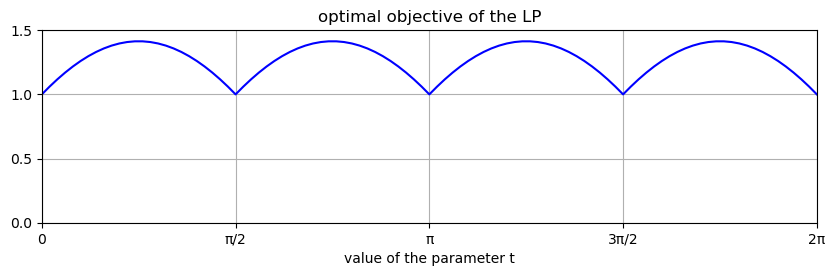

In [107]:
using JuMP, PyPlot, HiGHS

# define a set of 101 values of t, equally spaced on [0,2*pi]
Npts = 101
tvals=range(0,stop=2*pi,length=Npts) 
optvals = zeros(Npts)

for (i,t) in enumerate(tvals)
    m = Model(HiGHS.Optimizer)
    set_optimizer_attribute(m, "output_flag", false)
     # insert code here to set up and solve the problem for this "t", and save the objective
    @variable(m, p >= 0)
    @variable(m, q >= 0)
    @variable(m, r >= 0)
    @variable(m, s >= 0)
    @objective(m, Min, p + q + r + s)

    @constraint(m, q - s == sin(t))
    @constraint(m, p - r == cos(t))

    optimize!(m)
    optvals[i] = objective_value(m)
end

# here is some code to plot the results, assuming that the optimal values are stored in array "optvals"
figure(figsize=(10,2.5))
plot( tvals, optvals, "b-" )
xticks(0:π/2:2π)
yticks(0:0.5:1.5)
ylim([0,1.5])
xlim([0,2π])
grid()
g = gca()
g[:set_xticklabels](["0","π/2","π","3π/2","2π"])
xlabel("value of the parameter t")
title("optimal objective of the LP")
;

**Explanation:** 

**As t ranges from zero to 2π, the plot displays oscillations of the optimal object value between two values. Specifically, an optimal objective value of approximately 1.5 is obtained when cos(t) and sin(t) are positive, while an optimal objective value of approximately 0.5 is obtained when they are negative. The LP minimizes the sum of four positive numbers, which results in a large positive value when cos(t) and sin(t) have the same sign, and a small positive value when they have opposite signs.**

### 3 b) 

**WRITE YOUR SOLUTION TO PART (b) HERE**

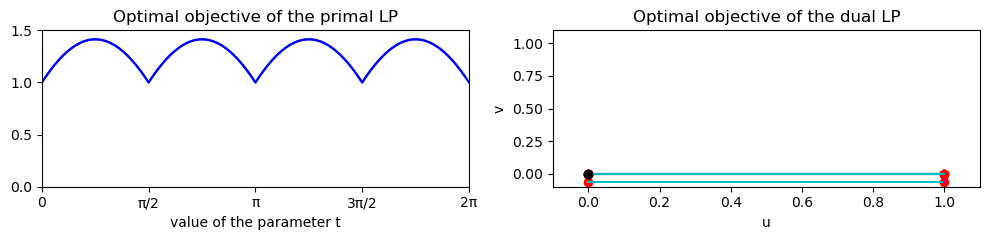

In [147]:
using PyPlot

# define a set of 101 values of t, equally spaced on [0,2*pi]
Npts = 101
tvals = range(0, stop=2*pi, length=Npts)
optvals_primal = zeros(Npts)
optvals_dual = zeros(Npts)

# create the figure and subplots outside the loop
fig, axs = subplots(ncols=2, figsize=(10, 2.5))

for (i, t) in enumerate(tvals)
    m = Model(HiGHS.Optimizer)
    set_optimizer_attribute(m, "output_flag", false)
    @variable(m, 0 <= p)
    @variable(m, 0 <= q)
    @variable(m, 0 <= r)
    @variable(m, 0 <= s)

    @constraint(m, q - s == sin(t))
    @constraint(m, p - r == cos(t))

    @objective(m, Min, p + q + r + s)
    optimize!(m)
    optvals_primal[i] = objective_value(m)

    vertices = [(0, 0), (0, sin(t)), (cos(t), 0), (cos(t), sin(t))]
    objvals = [cos(t) * u + sin(t) * v for (u, v) in vertices]
    optidx = argmin(objvals)
    optvals_dual[i] = objvals[optidx]

    if i >= Npts - 1
        axs[1].plot(tvals[1:i], optvals_primal[1:i], "b-")
        axs[1].set_xticks(0:π/2:2π)
        axs[1].set_yticks(0:0.5:1.5)
        axs[1].set_ylim([0, 1.5])
        axs[1].set_xlim([0, 2π])
        axs[1].grid()
        axs[1].set_xticklabels(["0", "π/2", "π", "3π/2", "2π"])
        axs[1].set_xlabel("value of the parameter t")
        axs[1].set_title("Optimal objective of the primal LP")

        axs[2].plot([v[1] for v in vertices], [v[2] for v in vertices], "ro")
        axs[2].plot([0, cos(t)], [0, 0], "b-")
        axs[2].plot([0, 0], [0, sin(t)], "g-")
        axs[2].plot([cos(t), 0], [sin(t), sin(t)], "c-")
        axs[2].plot([cos(t), cos(t)], [sin(t), 0], "m-")
        axs[2].plot(vertices[optidx][1], vertices[optidx][2], "ko")
        axs[2].set_xlim([-0.1, 1.1])
        axs[2].set_ylim([-0.1, 1.1])
        axs[2].set_xlabel("u")
        axs[2].set_ylabel("v")
        axs[2].set_title("Optimal objective of the dual LP")

        fig.tight_layout()
        fig.show()
    end
end